In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory,to_categorical
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad

In [4]:
def load_data(dir,image_size=(32,32)):
    data=image_dataset_from_directory(dir,image_size=image_size)
    images,labels=[],[]
    for x,y in data:
        images.append(x.numpy().astype('float32')/255.0)
        labels.append(y.numpy())
    X=np.concatenate(images)
    Y=np.concatenate(labels)
    Y=to_categorical(Y,10)
 
    return X,Y

In [6]:
X,Y=load_data("D:\\Source_code\\Lab\\data\\cifar10\\train")

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=42,stratify=Y,test_size=0.2)

Found 50000 files belonging to 10 classes.


In [9]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

logs={}

config={
    'gradient descent':SGD(0.01),
    'GD + Momentum':SGD(0.01,momentum=0.9),
    'GD + NEstrov':SGD(0.01,momentum=0.9,nesterov=True),
    'Adam':Adam(0.01),
    'RMSprop':RMSprop(0.01),
    'Adagrad':Adagrad(0.01)
}

for name,opt in config.items():
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    log=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=64)
    logs[name]=log.history

c:\Program Files\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3036 - loss: 1.9466 - val_accuracy: 0.3599 - val_loss: 1.8323
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3765 - loss: 1.7572 - val_accuracy: 0.4050 - val_loss: 1.6976
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4032 - loss: 1.6775 - val_accuracy: 0.3933 - val_loss: 1.7161
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4230 - loss: 1.6251 - val_accuracy: 0.4233 - val_loss: 1.6378
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4388 - loss: 1.5805 - val_accuracy: 0.4400 - val_loss: 1.5764
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3751 - loss: 1.7371 - val_accuracy: 0.3916 - val_loss: 1.7037
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4207 - loss: 1.6193 - val_accuracy: 0.4132 - val_loss: 1.6683
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4455 - loss: 1.5491 - val_accuracy: 0.4398 - v

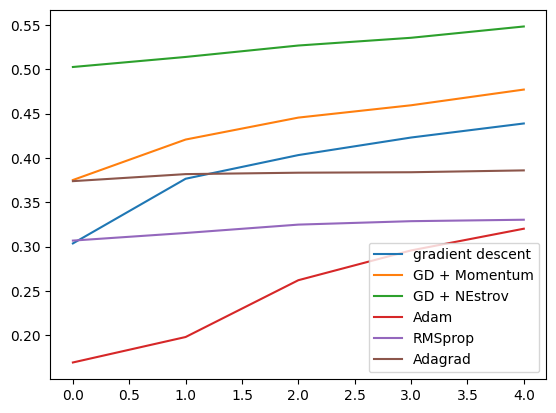

In [10]:
for name,log in logs.items():
    plt.plot(log['accuracy'],label=name)
plt.legend()
plt.show()